# Iris Dataset Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data wrangling

## Checking for missing values

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Droping duplicates

In [9]:
df.duplicated().sum()

0

## Droping columns

In [10]:
df.drop(['Id'],axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
df['Species']=class_le.fit_transform(df['Species'].values)

# Exploratory data analysis

In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

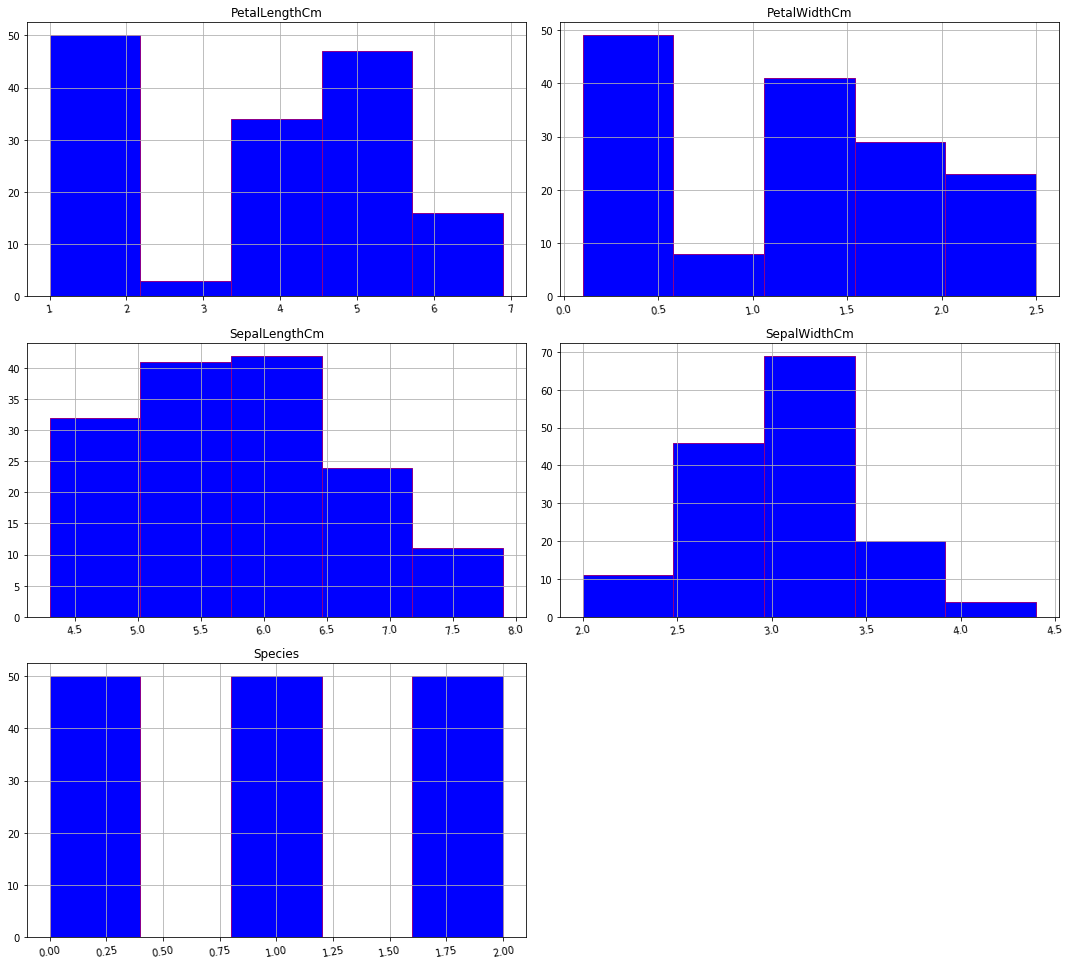

In [14]:
%matplotlib inline
fig=df.hist(bins=5,color='blue',edgecolor='darkmagenta',linewidth=1.0,xlabelsize=10,ylabelsize=10,xrot=10,yrot=0,figsize=(10,9),grid=True)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

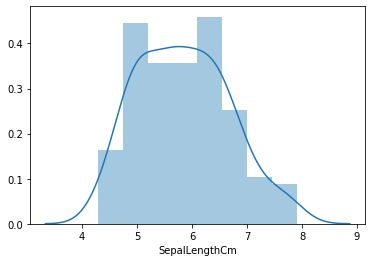

In [15]:
sns.distplot(df['SepalLengthCm'])

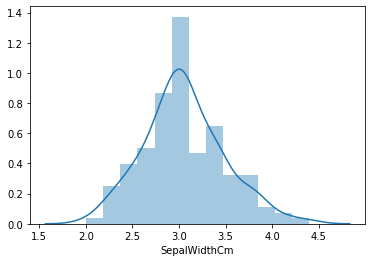

In [16]:
sns.distplot(df['SepalWidthCm'])

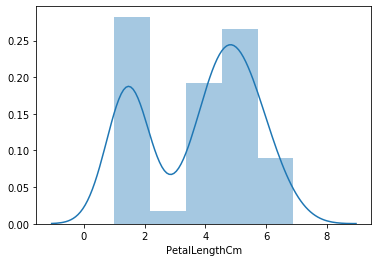

In [17]:
sns.distplot(df['PetalLengthCm'])

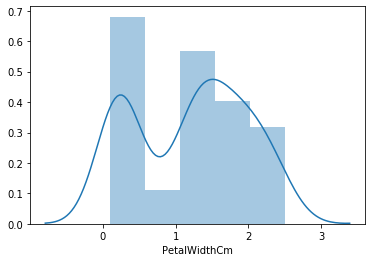

In [18]:
sns.distplot(df['PetalWidthCm'])

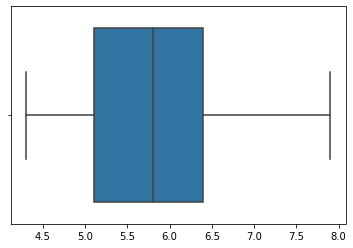

In [19]:
sns.boxplot(df[['SepalLengthCm']])


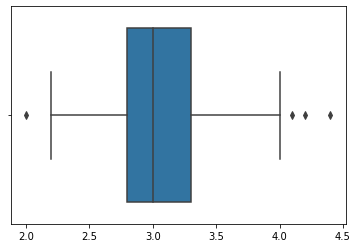

In [20]:
sns.boxplot(df[['SepalWidthCm']])


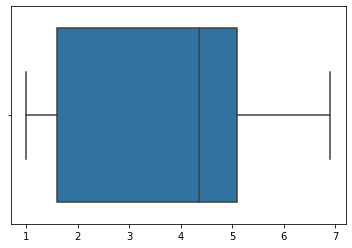

In [21]:
sns.boxplot(df[['PetalLengthCm']])


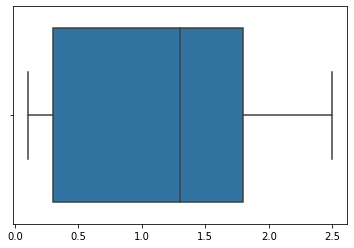

In [22]:
sns.boxplot(df[['PetalWidthCm']])

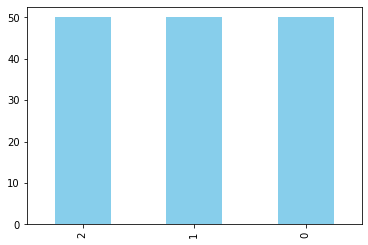

In [23]:
df['Species'].value_counts().plot.bar(color='skyblue')

## Bivariate Analysis

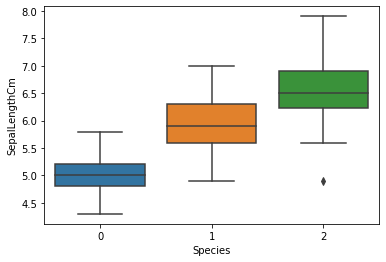

In [24]:
%matplotlib inline
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

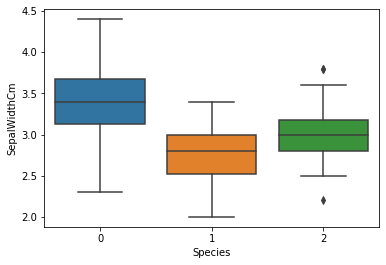

In [25]:
%matplotlib inline
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

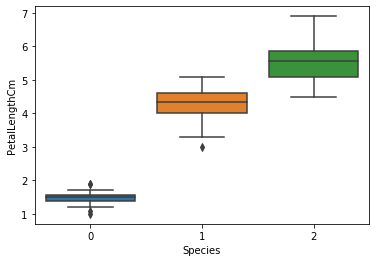

In [26]:
%matplotlib inline
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

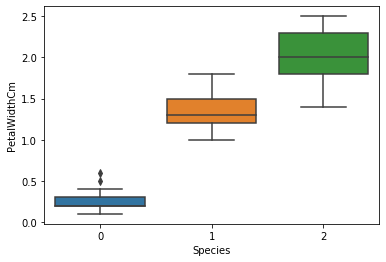

In [27]:
%matplotlib inline
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

## Multivariate Analysis

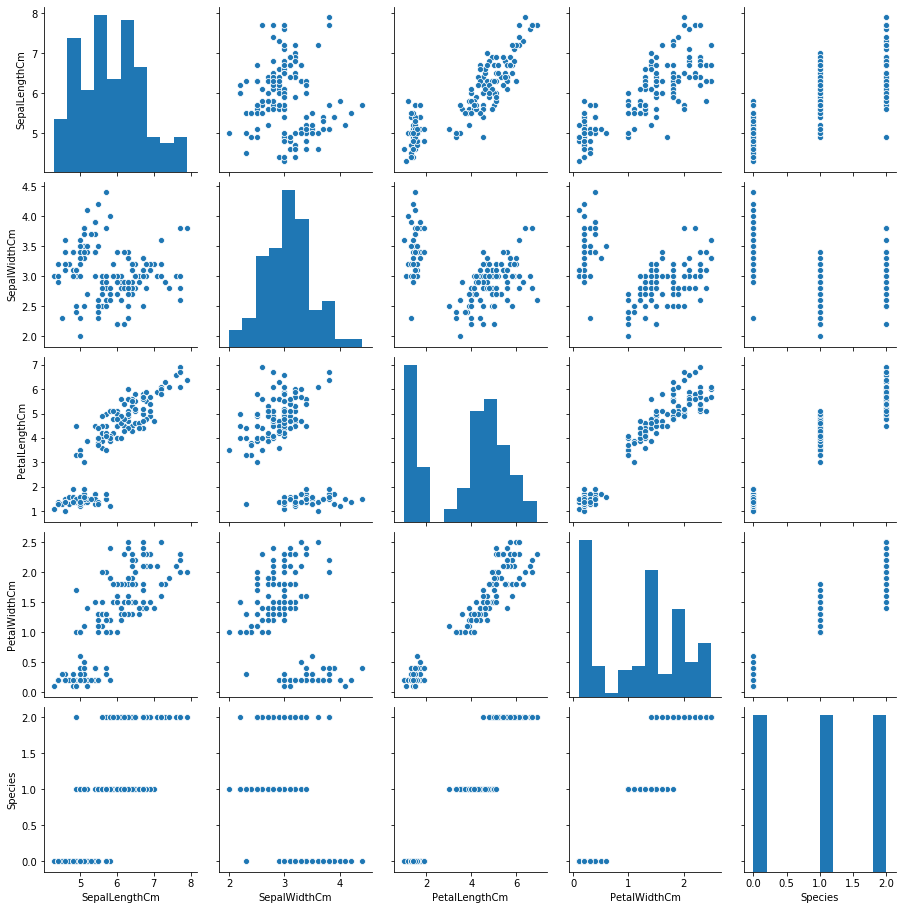

In [28]:
%matplotlib inline
sns.pairplot(df)

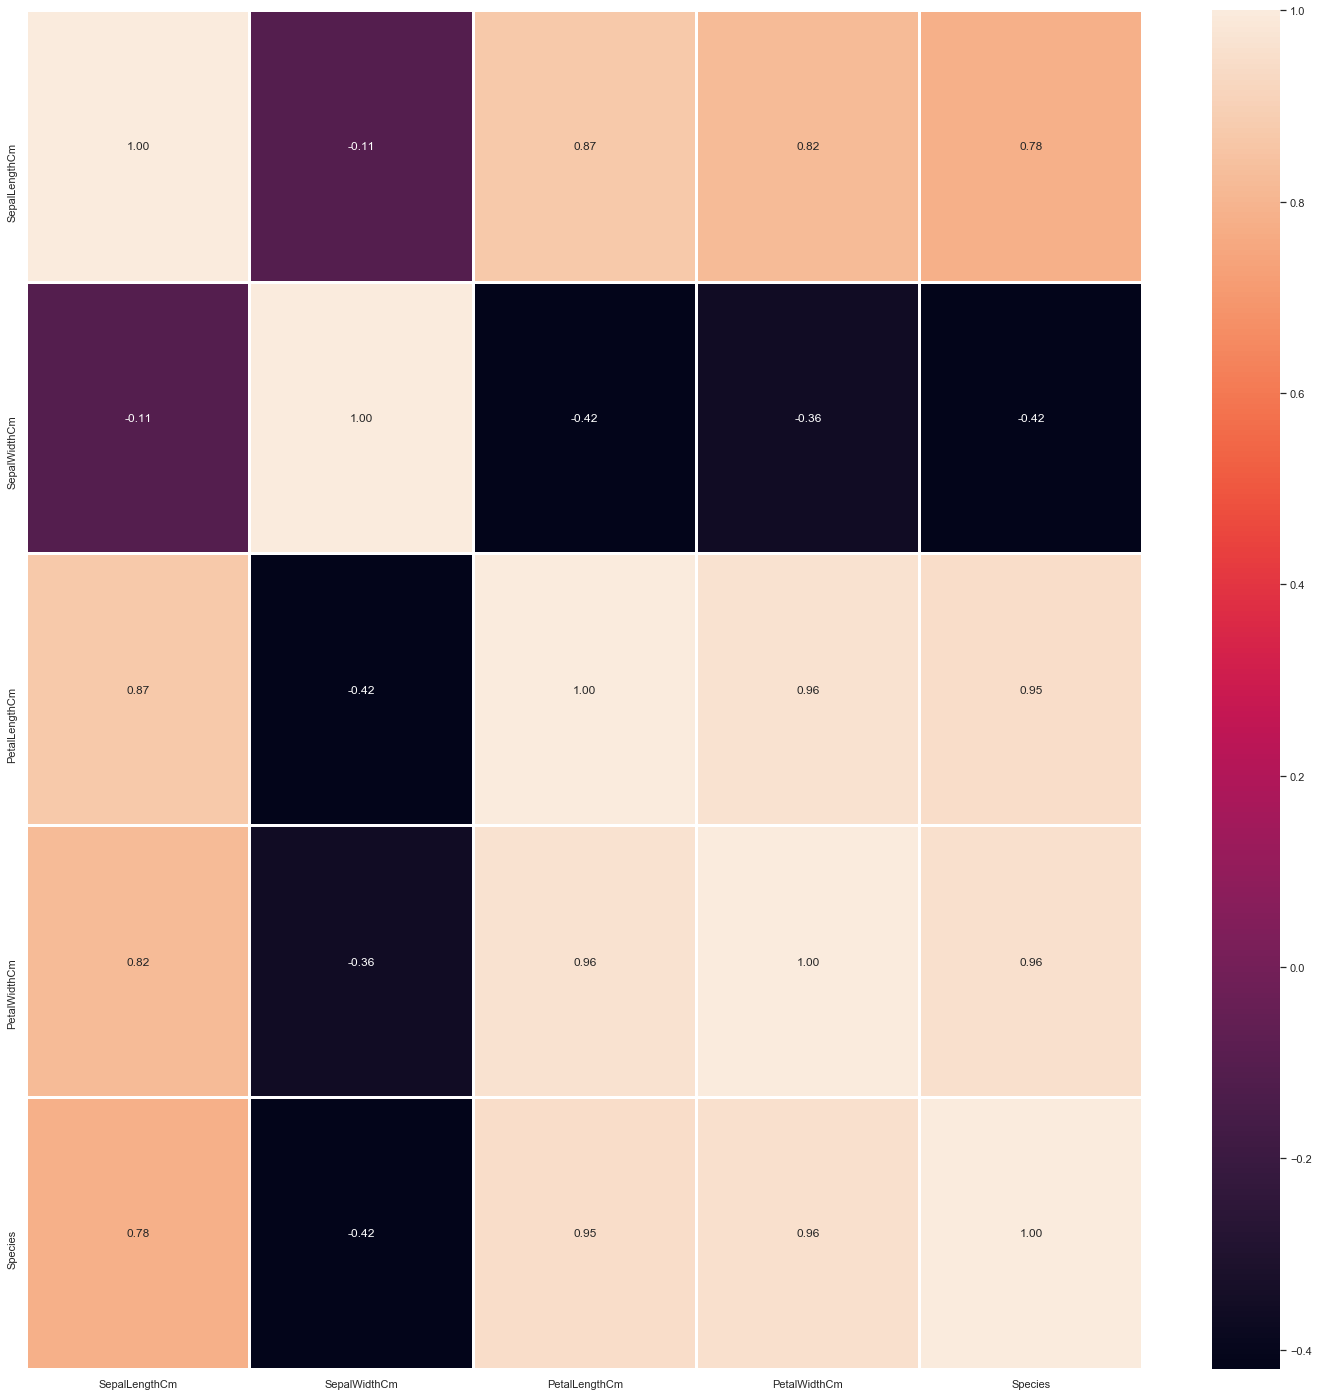

In [29]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=2)

# Model Development

## Logistic Regression

In [30]:
x=df.values[:,[0,4]]

In [31]:
y=df.values[:,4]

In [32]:
print('class labels:',np.unique(y))

class labels: [0. 1. 2.]


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sd=StandardScaler()

In [36]:
sd.fit(x_train)
x_train_std=sd.transform(x_train)
x_test_std=sd.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=1)
lr.fit(x_train_std,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores=cross_val_score(estimator=lr,X=x_train_std,y=y_train,cv=10,n_jobs=1)
print('Cv accuracy scores:%s'% scores)
print('Cv accuracy:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

Cv accuracy scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cv accuracy:1.000 +/- 0.000


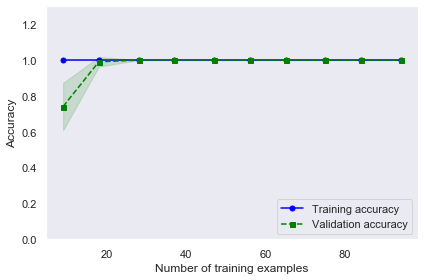

In [40]:
%matplotlib inline
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr,
                               X=x_train_std,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.3])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
y_pred=lr.predict(x_test_std)

In [43]:
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score

In [45]:
 print('precision: %.3f'% precision_score(y_true=y_test,y_pred=y_pred,average='micro'))

precision: 1.000


In [46]:
print('recall: %.3f'% recall_score(y_true=y_test,y_pred=y_pred,average='micro'))

recall: 1.000


In [47]:
print('f1 score: %.3f'% f1_score(y_true=y_test,y_pred=y_pred,average='micro'))

f1 score: 1.000


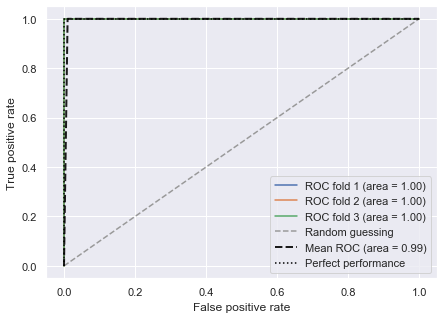

In [48]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.model_selection import StratifiedKFold

if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


X_train2 = x_train_std[:, :]
    

cv = list(StratifiedKFold(n_splits=3).split(x_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

## SVM

In [49]:
from sklearn.svm import SVC

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.pipeline import make_pipeline

In [57]:
pipe_svc=make_pipeline(SVC(random_state=1))

In [58]:
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

In [59]:
param_grid=[{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__kernel':['rbf'],'svc__gamma':param_range}]

In [60]:
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=1)

In [61]:
gs=gs.fit(x_train_std,y_train)

In [62]:
gs.best_score_

1.0

In [63]:
gs.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [64]:
y_pred2=gs.predict(x_test_std)

In [65]:
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred2)
print(confmat)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [66]:
print('precision: %.3f'% f1_score(y_true=y_test,y_pred=y_pred,average='micro'))

precision: 1.000


## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
pipe_tree=make_pipeline(DecisionTreeClassifier(random_state=1))

In [69]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

In [70]:
param_grid=[{'decisiontreeclassifier__criterion':criterion, 'decisiontreeclassifier__max_depth':max_depth}]

In [71]:
gs1=GridSearchCV(estimator=pipe_tree,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=1)

In [72]:
gs1.fit(x_train_std,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                     

In [73]:
gs1.best_score_

1.0

In [74]:
gs1.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 4}

In [75]:
y_pred3=gs.predict(x_test_std)

In [76]:
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred3)
print(confmat)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


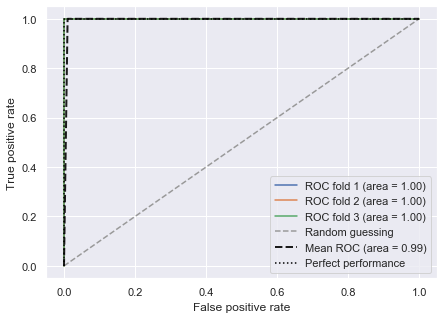

In [77]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.model_selection import StratifiedKFold

if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


X_train2 = x_train_std[:, :]
    

cv = list(StratifiedKFold(n_splits=3).split(x_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = gs1.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

In [80]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

In [81]:
tree_model.fit(x_train_std,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [85]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree2.png') 

True

In [86]:
from IPython.display import Image  

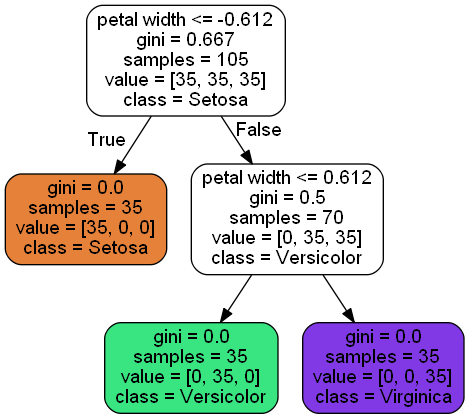

In [88]:
Image(filename='tree2.png', width=600) 

## Random Forest

In [89]:
from sklearn.pipeline import make_pipeline

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
pipe_forest=make_pipeline(RandomForestClassifier(random_state=1))

In [93]:
criterion = ['gini', 'entropy']
n_estimators = [25,50,75,100]

In [94]:
param_grid=[{'randomforestclassifier__criterion':criterion, 'randomforestclassifier__n_estimators':n_estimators}]

In [95]:
gsf=GridSearchCV(estimator=pipe_forest,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=1)

In [96]:
gsf.fit(x_train_std,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                          

In [97]:
gsf.best_score_

1.0

In [98]:
gsf.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__n_estimators': 25}

In [111]:
yf=gsf.predict(x_test_std)

In [112]:
confmat=confusion_matrix(y_true=y_test,y_pred=yf)
print(confmat)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


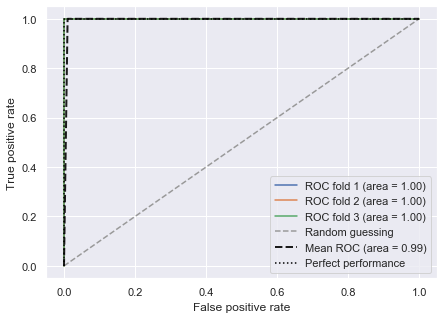

In [99]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.model_selection import StratifiedKFold

if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


X_train2 = x_train_std[:, :]
    

cv = list(StratifiedKFold(n_splits=3).split(x_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = gsf.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

## KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
pipe_ng=make_pipeline(KNeighborsClassifier(metric='minkowski'))

In [102]:
parameter=[1,2]
k=[3,4,5,6,7,8,9,10]

In [103]:
param_grid=[{'kneighborsclassifier__n_neighbors':k,'kneighborsclassifier__p':parameter}]

In [104]:
gsk=GridSearchCV(estimator=pipe_ng,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=1)

In [105]:
gsk.fit(x_train_std,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7,
                                                                8, 9, 10],
                          'kneighborsclassifier__p': [1, 

In [106]:
gsk.best_score_

1.0

In [107]:
gsk.best_params_

{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1}

In [108]:
y=gsk.predict(x_test_std)

In [109]:
confmat=confusion_matrix(y_true=y_test,y_pred=y)
print(confmat)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


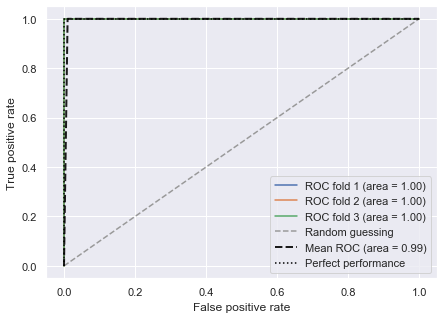

In [110]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.model_selection import StratifiedKFold

if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


X_train2 = x_train_std[:, :]
    

cv = list(StratifiedKFold(n_splits=3).split(x_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = gsk.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")